<a href="https://colab.research.google.com/github/devitam/Colab/blob/main/Practico_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabajo Práctico de Python
<p>Herramientas computacionales para la investigación.</p>
<p>UdeSA.</p>
<p>Mariano Devita.</p>

Base de datos

In [2]:
# Cargo la base
# Establezco el directorio en Colab.
from google.colab import files

# Subo la base a los files de Colab.
uploaded = files.upload()

Saving base_tarea.csv to base_tarea.csv


In [3]:
# Importo Pandas y Numpy
import pandas as pd
import numpy as np

# API para leer datos y escribirlos desde los archivos de Colab.
import io

# Defino y cargo la base teniendo en cuenta que mi Excel separa con ;.
df = pd.read_csv(
    io.StringIO(
        uploaded["base_tarea.csv"].decode('utf-8')
        ),
        sep=';'
        )

In [4]:
# Chequeo que la haya subido correctamente
# df

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


# Ejercicio 1.

In [7]:
# 1. Mostrar las primeras y últimas filas de la base (.head)
df.head(len(df))

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


# Ejercicio 2.

In [8]:
# 2. Obtener los tipos de datos de las variables. (.dtypes)
df.dtypes

Year                  int64
ID                    int64
Name                 object
State                object
County               object
Status               object
Type                 object
Company Type         object
Production            int64
Average Employees     int64
Labor_Hours           int64
date                 object
dtype: object

In [9]:
# Redefino los tipos de datos automaticamente al mejor posible.
df = df.convert_dtypes()

# Me fijo de nuevo.
df.dtypes

Year                  Int64
ID                    Int64
Name                 string
State                string
County               string
Status               string
Type                 string
Company Type         string
Production            Int64
Average Employees     Int64
Labor_Hours           Int64
date                 string
dtype: object

In [10]:
# Redefino el tipo de dato de date para que sea datetime.
df = df.astype({"date":"datetime64[ns]"})

# Vuelvo a chequear.
df.dtypes

Year                          Int64
ID                            Int64
Name                         string
State                        string
County                       string
Status                       string
Type                         string
Company Type                 string
Production                    Int64
Average Employees             Int64
Labor_Hours                   Int64
date                 datetime64[ns]
dtype: object

In [11]:
# Defino a date como index
df = df.set_index("date")

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,
2003-06-17,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392
2005-09-21,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447
2001-01-13,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2006-01-03,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193
2007-05-21,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393
...,...,...,...,...,...,...,...,...,...,...,...
2006-02-05,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249
2007-02-07,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449
2002-08-17,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684


# Ejercicio 3

In [12]:
# 3. Mostrar las primeras y últimas filas de la base de 3 columnas que elija (, usecols=cols)
df_ej3 = pd.read_csv(
    io.StringIO(
        uploaded["base_tarea.csv"].decode('utf-8')
        ),
        sep=';', 
        usecols=['County', 'Production', 'Labor_Hours']
        )
df_ej3.head(len(df_ej3))

,County,Production,Labor_Hours
0,Bibb,56004,22392
1,Blount,28807,28447
2,Fayette,1440115,474784
3,Franklin,87587,29193
4,Franklin,147499,46393
...,...,...,...
1445,Perry,18532,8249
1446,Saline,5070,1449
1447,Russell,377607,43684
1448,Pike,7744,622


# Ejercicio 4

In [13]:
# 4. Mostrar las estadísticas básicas (media, sd, min, max) de Production
# (df["Production"].sum()).
# .sum() hace la suma, y .describe() calcula las estadísticas descriptivas
df['Production'].describe()

count    1.450000e+03
mean     6.792012e+05
std      4.414922e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.060650e+04
75%      2.514752e+05
max      1.110055e+08
Name: Production, dtype: float64

# Ejercicio 5

In [14]:
# 5. Insertar una columna en la quinta posición y llenala de valores NaN (df.insert(XX, "columna", np.nan))
# Sintaxis en https://pandas.pydata.org/pandas-docs/stable/index.html, pandas.DataFrame.insert

df.insert(4, 'Missings', np.nan)
df

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2003-06-17,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392
2005-09-21,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447
2001-01-13,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2006-01-03,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193
2007-05-21,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-05,2013,1103254,Fidelity Mine,Refuse Recovery,NaN,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249
2007-02-07,2013,1102636,Wfi,Refuse Recovery,NaN,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449
2002-08-17,2013,4407233,Gobco #8,Refuse Recovery,NaN,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684


# Ejercicio 6

In [15]:
# 6. Importar a un dataframe los datos saltando las primeras 10 filas. (skiprows = XX)
df_ej6 = pd.read_csv(
    io.StringIO(
        uploaded["base_tarea.csv"].decode('utf-8')
        ),
        sep = ';',
        skiprows = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        )
df_ej6

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103180,Sloan Mountain Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28
1,2013,103182,Fishtrap,Alabama,Jefferson,Active,Surface,Operating Subsidiary,175058,30,87314,2005-09-30
2,2013,103285,Narley Mine,Alabama,Jefferson,Active,Surface,Operating Subsidiary,154861,39,90584,2006-03-07
3,2013,103332,Powhatan Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,140521,27,61394,2007-12-07
4,2013,103375,Johnson Mine,Alabama,Jefferson,Temporarily closed,Surface,Indepedent Producer Operator,580,2,1900,2002-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1436,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1437,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1438,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


# Ejercicio 7

In [16]:
# 7. Añadir una fila con la producción total y las horas de trabajo totales.
# (usar .sum(), pd.DataFrame(data=sum_row).T y reindex para agregar la fila).

df_ej7 = df
sum_row = df_ej7.sum()
tot = pd.DataFrame(data=sum_row).T

# No me salió con reindex, pero lo pude hacer con append.
df_ej7.append(tot)

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
2003-06-17 00:00:00,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392
2005-09-21 00:00:00,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447
2001-01-13 00:00:00,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2006-01-03 00:00:00,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193
2007-05-21 00:00:00,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-02-07 00:00:00,2013,1102636,Wfi,Refuse Recovery,NaN,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449
2002-08-17 00:00:00,2013,4407233,Gobco #8,Refuse Recovery,NaN,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684
2002-08-16 00:00:00,2013,1518524,Turkey Pen Refuse,Refuse Recovery,NaN,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622
2005-09-28 00:00:00,2013,1519685,Fedscreek Refuse Pile,Refuse Recovery,NaN,Pike,"Active, men working, not producing",Refuse,Indepedent Producer Operator,17357,3,1020


# Ejercicio 8

In [17]:
# 8. Importar a un data frame las primeras 10 filas (df.headl(n=10))
df_ej8 = df.head(10)
df_ej8

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2003-06-17,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392
2005-09-21,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447
2001-01-13,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2006-01-03,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193
2007-05-21,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393
2005-06-25,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195
2006-02-05,2013,100329,Concord Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,0,59,144002
2007-02-07,2013,100851,Oak Grove Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,2269014,447,1001809
2002-08-17,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,0,5,12396


# Ejercicio 9

In [18]:
# 9. Crear un subtotal de "Horas de trabajo" por ID (.groupby(ID').sum())

subtotal_horas_trabajadas = df.groupby("ID").sum("Labor_Hours")
subtotal_horas_trabajadas

,Year,Missings,Production,Average Employees,Labor_Hours
ID,,,,,
100329,2013,0.0,0,59,144002
100347,2013,0.0,537429,82,215295
100515,2013,0.0,8400,4,6240
100759,2013,0.0,1440115,183,474784
100851,2013,0.0,2269014,447,1001809
...,...,...,...,...,...
4801353,2013,0.0,111005549,1349,2811138
4801429,2013,0.0,5433936,78,161270
4801645,2013,0.0,350060,17,35687


# Ejercicio 10

In [19]:
# 10. Mostrar los valores para un ID de MSHA específico (ej. 102976)

df[df.ID == 102901]

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2002-08-17,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,0,5,12396
2002-08-16,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Underground,Indepedent Producer Operator,1453024,571,1237415


# Ejercicio 11

In [20]:
# 11. Mostrar aquellas observaciones en las que "Horas de trabajo" > 25000
df[df.Labor_Hours > 25000]

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2005-09-21,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447
2001-01-13,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2006-01-03,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193
2007-05-21,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393
2005-06-25,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-24,2013,4800677,Jim Bridger Mine,Wyoming,NaN,Sweetwater,Active,Surface,Operating Subsidiary,785984,182,368307
2006-11-15,2013,4801180,Black Butte And Leucite Hills,Wyoming,NaN,Sweetwater,Active,Surface,Operating Subsidiary,3657036,186,386879
2003-06-17,2013,4801646,Bridger Underground Coal Mine,Wyoming,NaN,Sweetwater,Active,Underground,Operating Subsidiary,4442616,278,661265


# Ejercicio 12

In [43]:
# 12. Encuentre todos los registros que incluyan dos identificaciones
# específicas de MSHA (.isin)

# Defino una variable, count, con los valores duplicados de ID en el dataframe.
# Le pido que me los sume para saber cuántos son.
count = df.ID.duplicated()
count.sum()

129

In [44]:
# Defino una tabla con 129 filas que tiene los ID que se duplican. Para eso
# uso loc, que sirve para acceder a un grupo de filas y columnas. El grupo de
# filas, en este caso, es el que está en count
df_ej12 = df.loc[count]

# A la columna ID dentro de el dataframe df_ej12 la llamo s.
s = df_ej12["ID"]

# Le pido que me devuelva True o False si el ID de la base (df) está en s.
df["ID"].isin(s)

date
2001-01-13    False
2001-01-13    False
2001-01-13    False
2001-01-13    False
2001-01-13    False
              ...  
2007-12-07    False
2007-12-07    False
2007-12-07     True
2007-12-07    False
2007-12-07    False
Name: ID, Length: 1450, dtype: bool

# Ejercicio 13

In [23]:
# 13. Ordenar los registros por la columna “Horas de trabajo” (df.sort_values)
df.sort_values(by="Labor_Hours")

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2005-09-21,2013,3608140,Bell Corp,Pennsylvania (Anthracite),NaN,Schuylkill,Temporarily closed,Surface,Indepedent Producer Operator,23,2,35
2005-07-24,2013,1519619,No. 1 Auger,Kentucky (East),NaN,Floyd,Temporarily closed,Surface,Indepedent Producer Operator,700,3,40
2005-07-24,2013,3610027,Paradise Bank,Refuse Recovery,NaN,Northumberland,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53
2001-01-13,2013,3609189,Ser #3163,Pennsylvania (Bituminous),NaN,Indiana,Active,Surface,Indepedent Producer Operator,574,1,54
2007-12-07,2013,1519554,No 1,Refuse Recovery,NaN,Harlan,Permanently abandoned,Refuse,Indepedent Producer Operator,8586,1,133
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-02-07,2013,4601437,Mcelroy Mine,West Virginia (Northern),NaN,Marshall,Active,Underground,Operating Subsidiary,9403070,957,2194378
2005-06-25,2013,101401,No 7 Mine,Alabama,NaN,Tuscaloosa,Active,Underground,Operating Subsidiary,5405412,989,2464719
2006-03-07,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138


# Ejercicio 14

In [24]:
# 14. Haga una lista en donde date esté entre febrero 2005 y noviembre 2006 (df['date'] >=XX)
df = df.sort_index()
df['2005-2-1':'2006-12-1']

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2005-06-25,2013,4609468,No. 3b Mine,West Virginia (Southern),NaN,Mingo,"Active, men working, not producing",Underground,Indepedent Producer Operator,30534,66,30035
2005-06-25,2013,4609302,Arco No. 1 Mine,West Virginia (Northern),NaN,Marion,"Active, men working, not producing",Underground,Indepedent Producer Operator,1659,4,3175
2005-06-25,2013,3602703,Fisher Mining Company,Pennsylvania (Bituminous),NaN,Lycoming,Active,Surface,Indepedent Producer Operator,228232,34,90722
2005-06-25,2013,4609440,Rock Camp Surface No. 1,West Virginia (Southern),NaN,Nicholas,Active,Surface,Indepedent Producer Operator,27716,11,13154
2005-06-25,2013,4608563,Ragland Loadout,West Virginia (Southern),NaN,Mingo,Active,Surface,Operating Subsidiary,0,37,49674
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-11-15,2013,103342,Reese's Branch Mine,Alabama,NaN,Walker,Active,Surface,Contractor,263888,56,115123
2006-11-15,2013,4605992,Homer Iii Processing,West Virginia (Southern),NaN,Boone,Active,Surface,Operating Subsidiary,0,11,27617
2006-11-15,2013,4606045,Brooks Run Processing Plant No,West Virginia (Northern),NaN,Webster,Active,Surface,Operating Subsidiary,0,21,47964


# Ejercicio 15

In [25]:
# 15. Mostrar la lista de aquellos cuyos date sea 2005 (use df.set_index)
df['2005-1-1':'2006-1-1']

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2005-06-25,2013,4609468,No. 3b Mine,West Virginia (Southern),NaN,Mingo,"Active, men working, not producing",Underground,Indepedent Producer Operator,30534,66,30035
2005-06-25,2013,4609302,Arco No. 1 Mine,West Virginia (Northern),NaN,Marion,"Active, men working, not producing",Underground,Indepedent Producer Operator,1659,4,3175
2005-06-25,2013,3602703,Fisher Mining Company,Pennsylvania (Bituminous),NaN,Lycoming,Active,Surface,Indepedent Producer Operator,228232,34,90722
2005-06-25,2013,4609440,Rock Camp Surface No. 1,West Virginia (Southern),NaN,Nicholas,Active,Surface,Indepedent Producer Operator,27716,11,13154
2005-06-25,2013,4608563,Ragland Loadout,West Virginia (Southern),NaN,Mingo,Active,Surface,Operating Subsidiary,0,37,49674
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-24,2013,4407231,Deep Mine 37,Virginia,NaN,Dickenson,Active,Underground,Operating Subsidiary,379420,86,173903
2005-12-24,2013,4406859,War Creek No. 1,Virginia,NaN,Tazewell,"Active, men working, not producing",Underground,Indepedent Producer Operator,49641,50,113060
2005-12-24,2013,1519614,Maple Creek Mine #1,Kentucky (East),NaN,Whitley,Active,Surface,Indepedent Producer Operator,64648,21,48468


# Ejercicio 16

In [26]:
# 16. Ordenar en base a ID y date columnas dadas (df.sort_values(by=['xx','xx'], ascending=[0,1]))
df.sort_values(by=['ID','date'], ascending=[0,1])

,Year,ID,Name,State,Missings,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours
date,,,,,,,,,,,,
2002-08-17,2013,5000030,Usibelli,Alaska,NaN,Fairbanks North Star,Active,Surface,Indepedent Producer Operator,1631584,125,286079
2003-06-17,2013,4801646,Bridger Underground Coal Mine,Wyoming,NaN,Sweetwater,Active,Underground,Operating Subsidiary,4442616,278,661265
2001-01-13,2013,4801645,Addcar System 18 Hwm Serial No,Colorado,NaN,Rio Blanco,Active,Surface,Indepedent Producer Operator,350060,17,35687
2007-12-07,2013,4801429,Dry Fork Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,5433936,78,161270
2006-03-07,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-02-07,2013,100851,Oak Grove Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,2269014,447,1001809
2001-01-13,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784
2001-01-13,2013,100515,Mary Lee # 1 Mine,Refuse Recovery,NaN,Walker,"Active, men working, not producing",Refuse,Indepedent Producer Operator,8400,4,6240


# Ejercicio 17

No entendí muy bien la consigna aquí. Asumí que lo que tenía que lograr es una base con 4350 observaciones: la base copiada tres veces. Usando pd.concat hice las dos cosas que entendí.

Primero, concatenar tres bases como lo haría en Excel. Es decir, en Excel, copiaría las tres hojas y después crearía otro Excel que contenga los datos de las tres hojas. En python, con pandas, eso lo puedo hacer con pd.concat, concatenando tres veces la base que tengo.

In [27]:
# 17. Crear tres hojas de datos (sheet) desde el archivo de Excel y combinarlas en un único Excel.
# Las tres hojas de datos son las mismas, sería triplicar el Excel (pd.concat)

df_ej17 = pd.concat([df, df, df])

Segundo, entendí que en el archivo de Excel debíamos crear tres hojas, importar esas tres hojas por separado y después concatenerlas en python y guardarlas en un único Excel.

In [28]:
# Importo un Excel con las 3 hojas creadas
from google.colab import files
uploaded_2 = files.upload()

Saving base_tarea2.xls to base_tarea2.xls


In [29]:
# Defino al Excel importado como xls.
xls = pd.ExcelFile("/content/base_tarea2.xls")

In [30]:
# Armo tres dataframes con cada hoja del Excel subido.
df_1 = pd.read_excel(xls, "Hoja1")
df_2 = pd.read_excel(xls, "Hoja2")
df_3 = pd.read_excel(xls, "Hoja3")

In [31]:
# Defino el dataframe concatenando los tres dataframes creados.
df_ej17_2 = pd.concat([df_1, df_2, df_3])

In [32]:
# Guardo la base en Colab: /content/concatenada.xls y la descargo.
df_ej17_2.to_excel("concatenada.xls")

files.download("concatenada.xls")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ejercicio 18

In [33]:
# 18. Dibujar un gráfico de barras comparando el año, el ID, la producción
# y las horas de trabajo de las primeras 10 observaciones (usar head(10) y
# plot(kind='bar'))

# Importo Matplotlib para hacer gráficos y que los pegue en el notebook
import matplotlib.pyplot as plt
%matplotlib inline

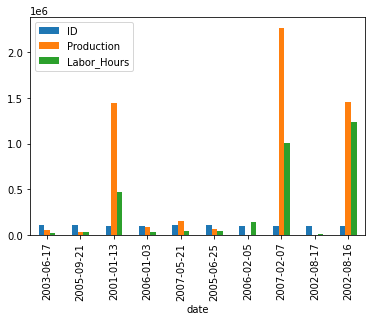

In [41]:
# Defino la base con usecols para sacar únicamente los datos de date,
# Production, ID y Labor_Hours.
df_ej18 = pd.read_csv(
    io.StringIO(
        uploaded["base_tarea.csv"].decode('utf-8')
        ),
        sep=';', 
        usecols=['date', 'ID', 'Production', 'Labor_Hours']
        )
# Cambio el index a date
df_ej18 = df_ej18.set_index("date")

# Me quedo con las primeras 10 observaciones
df_ej18 = df_ej18.head(10)

# Gráfico
df_ej18.plot(kind="bar")

# Ejercicio 19

<BarContainer object of 10 artists>

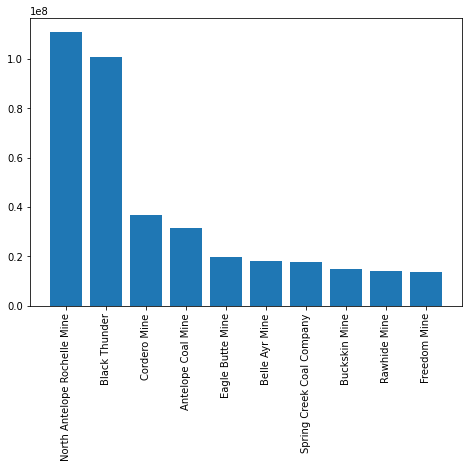

In [42]:
# 19. Dibujar un gráfico de barras de las 10 empresas con mayor producción (df.sort_values)
df_ej19 = df.sort_values("Production", ascending=False)
df_ej19 = df_ej19.head(10)
df_ej19

fig = plt.figure()
graf = fig.add_axes([0,0,1,1])
prod = df_ej19["Production"]
emp = df_ej19["Name"]
plt.xticks(rotation=90)
graf.bar(emp,prod)